## Exploratory FM

We introduced a slight tweak to the standard FM algorithm to make it more resistant to local minima. Typical FM works by choosing the best node to move (in terms of the cost improvement) at each iteration, then locking that node for the duration of the pass. This continues until every valid move available has been made. The algorithm does not prevent moves that increase cost, it simply chooses those that increase the cost the least. This allows long sequences of moves to be probed and increases chances of escaping local minima. At the end of the pass, the state of the graph is rolled back to the point at which the cost was minimal. This is then repeated for some number of passes. 

The tweak we made is to only perform the roll-back intermittently, allowing more complex sequences of moves to be probed before roll-back. This means that the cost doesn't necessarily decrease with each pass, but does on average. This turns out to be very effective, as long as we terminate each pass before all nodes have been moved. If we wait for all nodes to be moved, there is no benefit to this tweak.

In [3]:
from disqco import QuantumCircuitHyperGraph
from qiskit import transpile
from disqco.circuits.cp_fraction import cp_fraction
from disqco import set_initial_partition_assignment
from disqco import QuantumNetwork

num_qubits = 48

num_partitions = 6

qpu_info = [int(num_qubits/num_partitions) + 1 for i in range(num_partitions)]
network = QuantumNetwork(qpu_info)

circuit = cp_fraction(num_qubits, num_qubits, 0.5)
circuit = transpile(circuit, basis_gates=['cp', 'u'])

graph = QuantumCircuitHyperGraph(circuit, group_gates=True)

initial_assignment = set_initial_partition_assignment(graph, network)

from disqco.parti import FiducciaMattheyses

partitioner = FiducciaMattheyses(circuit,
                                 network=network,
                                initial_assignment=initial_assignment,
                                hypergraph=graph)

results = partitioner.partition(limit=num_qubits*graph.depth*0.125,
                                stochastic=False)

cost_list_1 = results['cost_list']


partitioner = FiducciaMattheyses(circuit,
                                 network=network,
                                initial_assignment=initial_assignment,
                                hypergraph=graph)

results = partitioner.partition(limit=num_qubits*graph.depth*0.125,
                                stochastic=True)

cost_list_2 = results['cost_list']


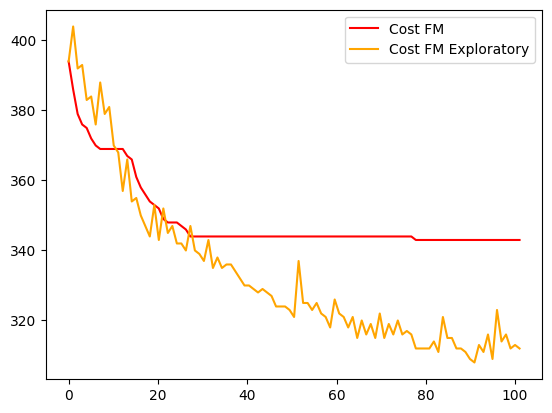

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, len(cost_list_1), len(cost_list_1))  # Create a list of numbers from 0 to 1 with 50 elements

y1 =  cost_list_1    # Data for right y-axis
y2 =  cost_list_2    # Data for right y-axis

fig, ax1 = plt.subplots()

plt.plot(x, y1, color="red", label="Cost FM")
plt.plot(x, y2, color="orange", label="Cost FM Exploratory")

plt.legend()

